### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### Load the data

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

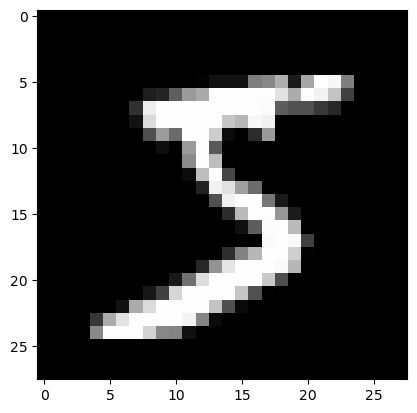

In [8]:
plt.imshow(x_train[0], cmap='gray')

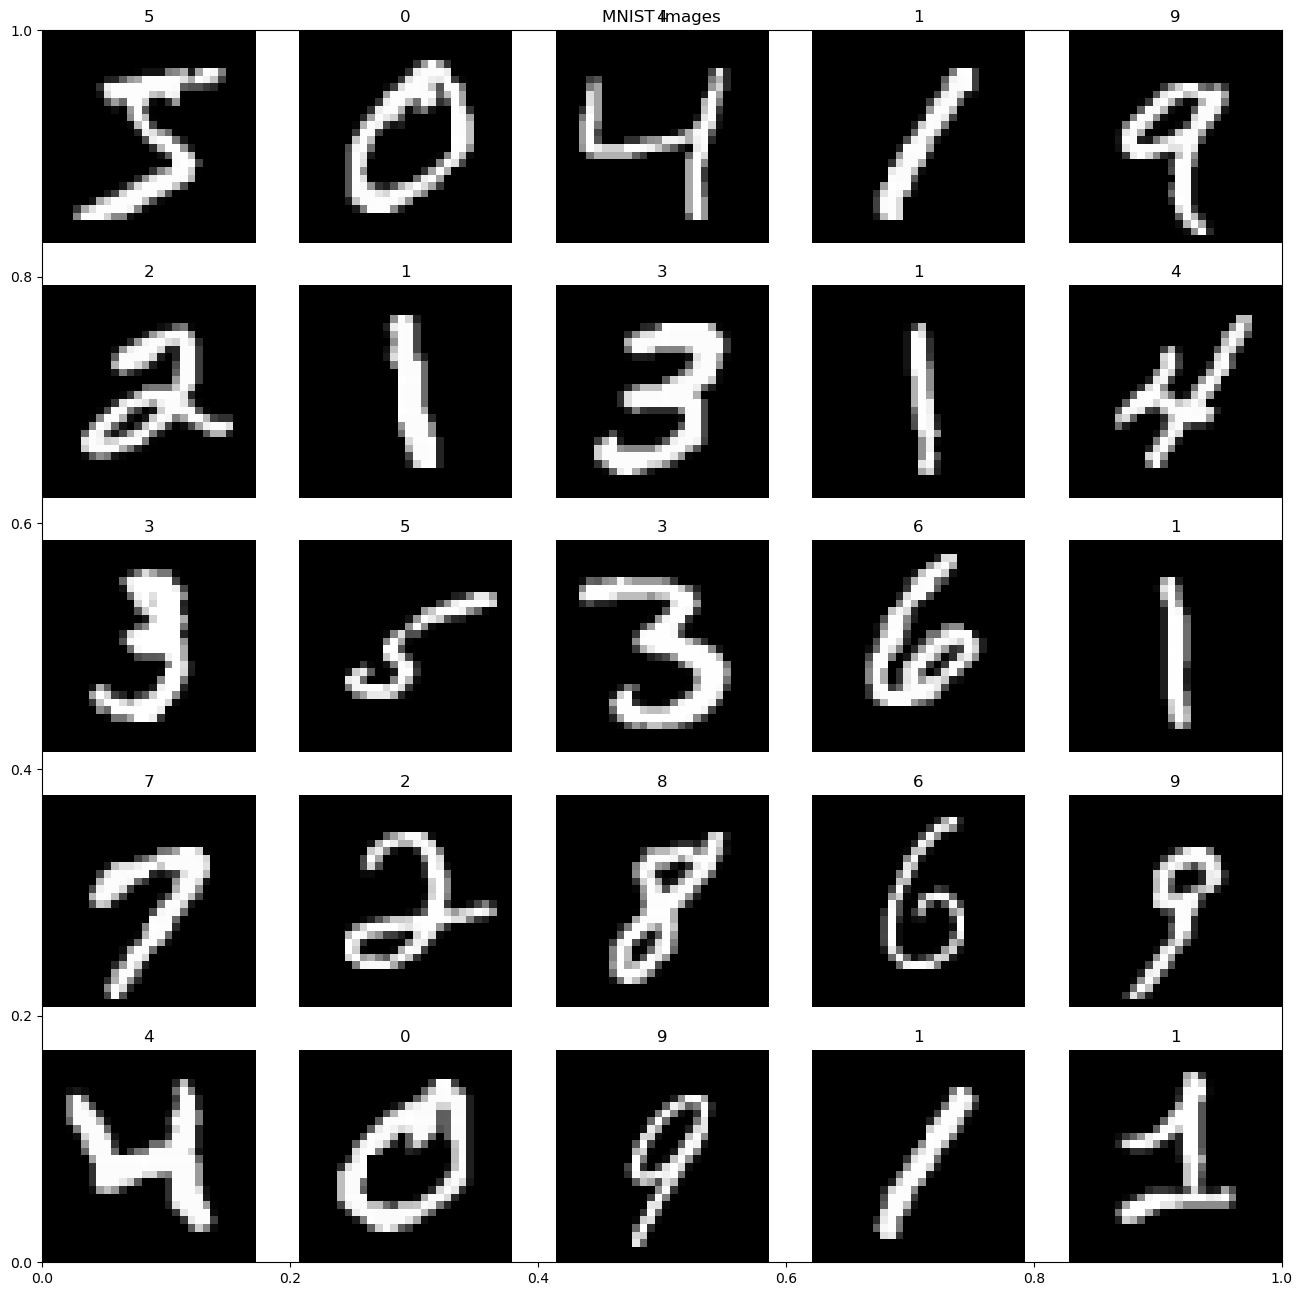

In [30]:
plt.figure(figsize=(16,16))
plt.title('MNIST Images')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

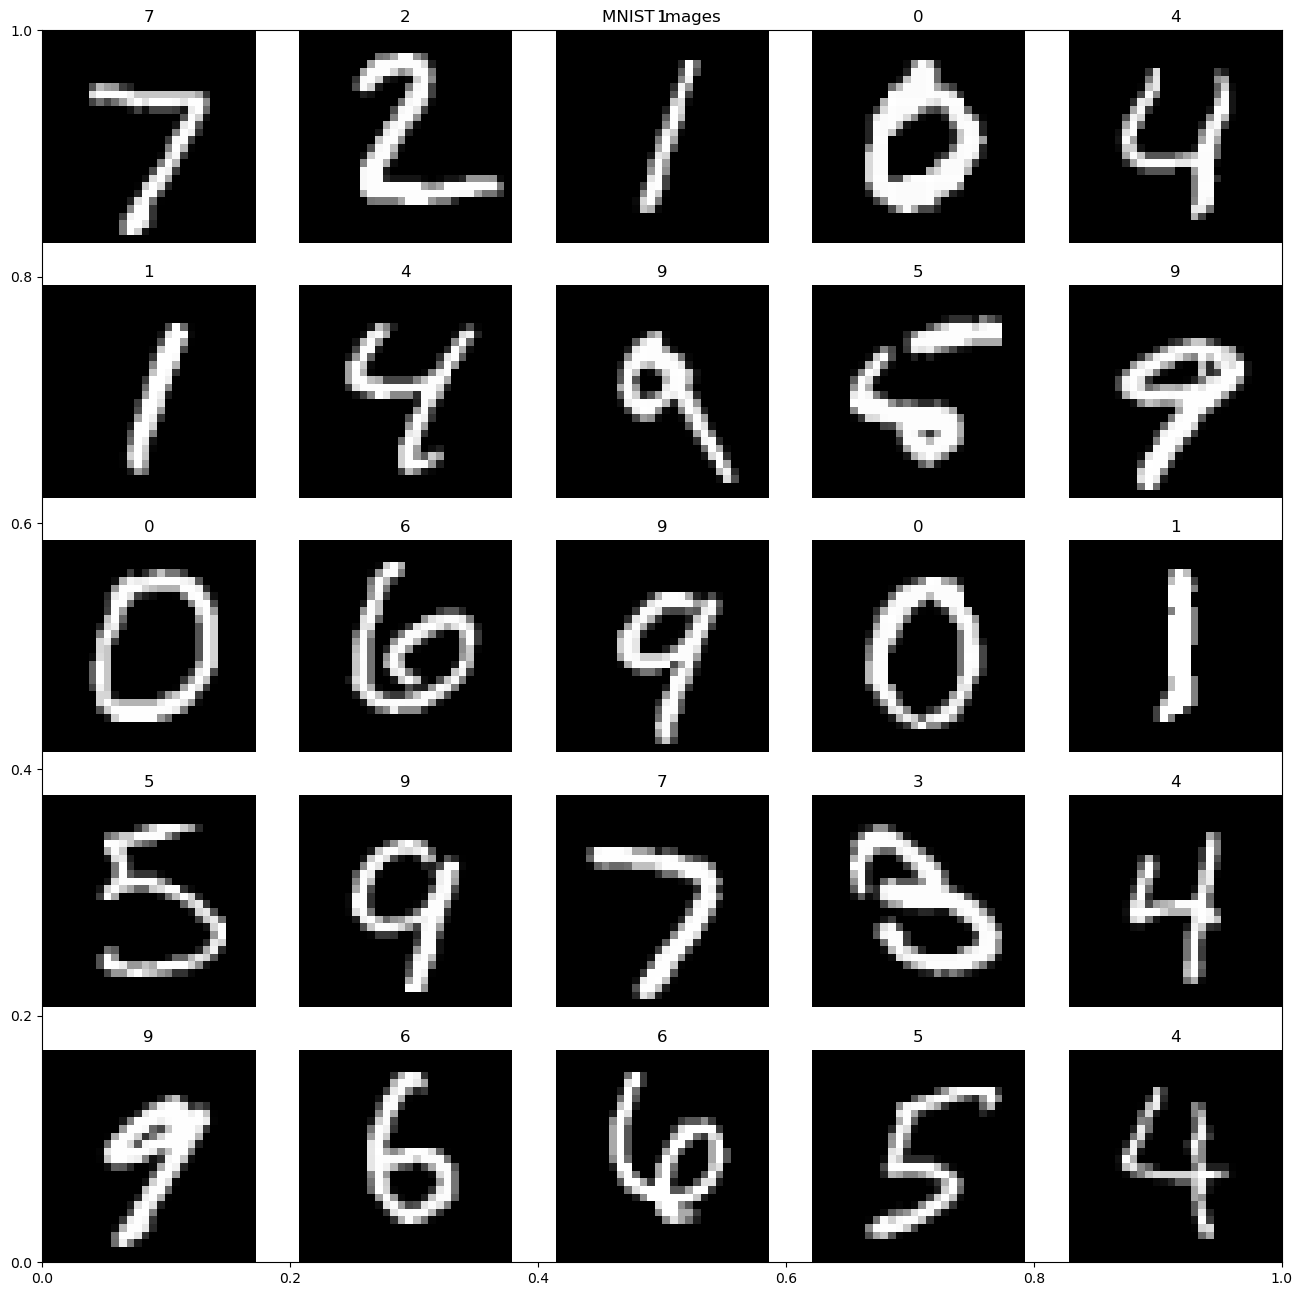

In [31]:
plt.figure(figsize=(16,16))
plt.title('MNIST Images')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

### Data Preparation

In [32]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalize the data

In [33]:
x_train= x_train/255
x_test= x_test/255

### Convert 2D data to 1D

In [34]:
x_train[0].shape

(28, 28)

In [36]:
x_train[0].size

784

In [37]:
m=np.array([[6,3,1],[8,9,7]])

In [38]:
m

array([[6, 3, 1],
       [8, 9, 7]])

In [40]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [41]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [42]:
np.reshape(m,m.size)

array([6, 3, 1, 8, 9, 7])

In [43]:
x_train= x_train.reshape(-1, x_train[0].size)
x_test= x_test.reshape(-1, x_test[0].size)

In [44]:
x_train.shape

(60000, 784)

In [45]:
x_test.shape

(10000, 784)

### Prepare the output variable

In [46]:
import seaborn as sns

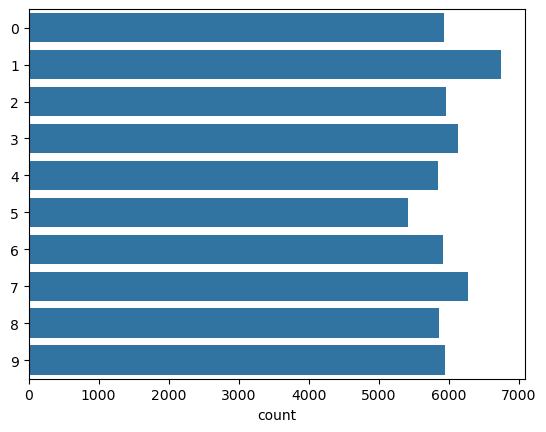

In [48]:
sns.countplot(y=y_train);

In [49]:
y_train.shape

(60000,)

In [50]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [51]:
y_train.shape

(60000, 10)

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build the Model

In [55]:
model= Sequential()

#Input layer
model.add(Dense(512, input_shape=(784,), activation='relu'))

#Hidden Layer
model.add(Dense(128, activation='relu'))

#Output Layer
model.add(Dense(10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# plot_model(model, show_layer_activations=True, show_layer_names=True,
#           show_shapes=True)

### Compile the model

In [63]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### Train the model

In [64]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 25s 4ms/step - loss: 0.1845 - accuracy: 0.9432
Epoch 2/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0865 - accuracy: 0.9733
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0607 - accuracy: 0.9812
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0414 - accuracy: 0.9877
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0362 - accuracy: 0.9897
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0316 - accuracy: 0.9906
Epoch 8/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 9/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0269 - accuracy: 0.9924
Epoch 10/10
6000/6000 [==============================] - 22s 4ms/step -

### Evaluate on Test Data

In [65]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 22s 2ms/step - loss: 0.1185 - accuracy: 0.9776


[0.11847478896379471, 0.9775999784469604]

### Predict on new image

In [66]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()

In [67]:
new=x_test[1234]

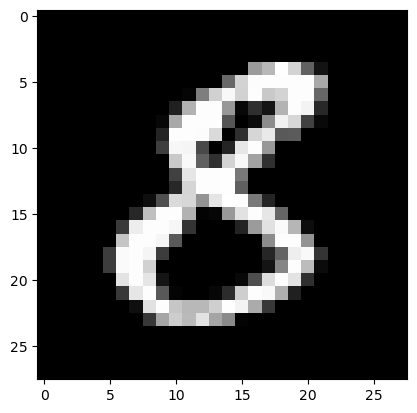

In [69]:
plt.imshow(new, cmap='gray')

In [74]:
#scale it
new =new/255
new=new.reshape(1,784)

result=model.predict(new)

np.argmax(result)

1/1 [==============================] - 0s 48ms/step


8

In [102]:
import cv2

img= cv2.imread('images/predict.png',0)

In [103]:
img=cv2.resize(img,(28,28))

In [104]:
img.shape

(28, 28)

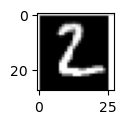

In [105]:
plt.figure(figsize=(1,1))
plt.imshow(img,cmap='gray')

In [106]:
img= img/255
img=img.reshape(1,784)

result=model.predict(img)

np.argmax(result)

1/1 [==============================] - 0s 54ms/step


2